In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

from numpy.random import permutation
# there is a permutation function we need from numpy.random

import matplotlib.colors as pltco # A package to help with coloring plots

In [2]:
bank_note_url = 'https://drive.google.com/uc?export=download&id=1qOfx-0fL7VMhUFJeQ3fDIYa3EhHeTm-U'

bank_note_data = pd.read_csv(bank_note_url)
bank_note_data

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
temp = bank_note_data.loc[:, ['Image.Curt', 'Image.Var', 'Class']].dropna()
# You should deal with na values first; either by dropping them or by devising a method to 
# fill them in.


# the functions in scikit-learn all work with numpy arrays 

# X is our input features
X = np.array(temp.loc[:, ['Image.Curt', 'Image.Var']])


# y is our output feature
y = np.array(temp.loc[:, 'Class'])

# Note that these need to be numpy.arrays and so we have to recode string variables to
# be represented by numerical values.


In [14]:
# Make the training and testing sets

# we will choose the size of our testing set to be 20% of the data we have
n = X.shape[0]
test = int(0.20*n)

# choose a random shuffling of the data and apply it to both the inputs and the output.
perm = permutation(n)
X = X[perm]
y = y[perm]

# Build the testing and training sets
X_test = X[:test]
y_test = y[:test]

X_train = X[test:]
y_train = y[test:]

In [15]:
# We need a function to display the results
# I am defining it here. Note that this assumes we only have two features for our inputs.

# Note I am not going to ask you to write functions like this

def plot_cat_model(clf, X_train, y_train, X_test, y_test):
    
    h = 0.2 # Mesh Size
    
    # Make a mesh and then plot the decision boundary. To do that we assign a 
    # color to teach point in the mesh.
    # This tries to gets the boundaries for the box to draw. You may have to adjust 
    # this min and max values in some cases.
    xx_min, xx_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    yy_min, yy_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    
    xx, yy = np.meshgrid(np.arange(xx_min, xx_max, h), 
                        np.arange(yy_min, yy_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # you can adjust the output figure size here
    plt.figure(figsize=(8, 6))
    
    # define the colors - note we need a color for each answer in our output
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    
    # plot the classification
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # plot the training set
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, marker='o')
    
    # plot the testing set
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+')
    
    # Print out the score results for the classifier also
    print('Training Score: {}'.format(clf.score(X_train, y_train)))
    print('Testing Score: {}'.format(clf.score(X_test, y_test)))

# With K-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

Training Score: 0.9180327868852459
Testing Score: 0.8795620437956204


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


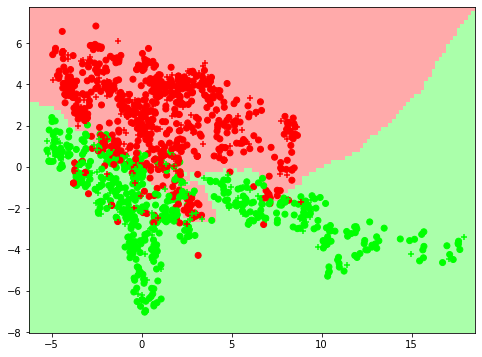

In [17]:
clf = KNeighborsClassifier(n_neighbors = 14)
clf.fit(X_train, y_train)
plot_cat_model(clf, X_train, y_train, X_test, y_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from sklearn.tree import export_graphviz

Training Score: 0.8979963570127505
Testing Score: 0.8832116788321168


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


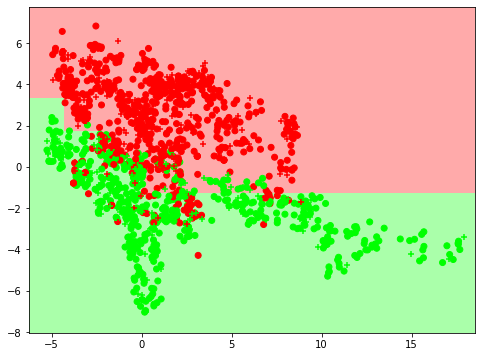

In [18]:
clf_tree = DecisionTreeClassifier(max_depth = 4)
clf_tree.fit(X_train, y_train)
plot_cat_model(clf_tree, X_train, y_train, X_test, y_test)

In [19]:
from sklearn.neural_network import MLPClassifier

Training Score: 0.9080145719489982
Testing Score: 0.8978102189781022


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


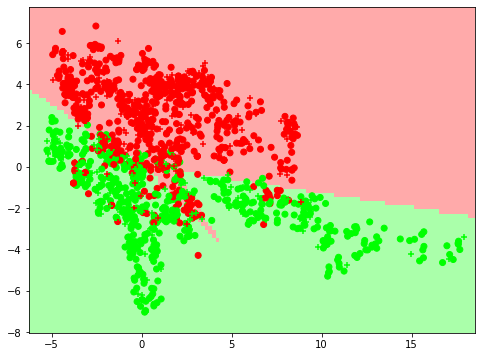

In [24]:
clf_network = MLPClassifier(hidden_layer_sizes=(20, 20))
clf_network.fit(X_train, y_train)
plot_cat_model(clf_network, X_train, y_train, X_test, y_test)

# With all of the columns

In [32]:
X = np.array(bank_note_data.drop('Class', axis=1))


# y is our output feature
y = np.array(bank_note_data.loc[:, 'Class'])

# Note that these need to be numpy.arrays and so we have to recode string variables to
# be represented by numerical values.


In [33]:
# Make the training and testing sets

# we will choose the size of our testing set to be 20% of the data we have
n = X.shape[0]
test = int(0.20*n)

# choose a random shuffling of the data and apply it to both the inputs and the output.
perm = permutation(n)
X = X[perm]
y = y[perm]

# Build the testing and training sets
X_test = X[:test]
y_test = y[:test]

X_train = X[test:]
y_train = y[test:]

In [41]:
clf = KNeighborsClassifier(n_neighbors = 14)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 1.0)

In [42]:
clf_tree = DecisionTreeClassifier(max_depth = 4)
clf_tree.fit(X_train, y_train)
clf_tree.score(X_train, y_train), clf_tree.score(X_test, y_test)

(0.9590163934426229, 0.9635036496350365)

In [46]:
clf_network = MLPClassifier(hidden_layer_sizes=(4, 2))
clf_network.fit(X_train, y_train)
clf_network.score(X_train, y_train), clf_network.score(X_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(1.0, 1.0)